In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Preprocessed Dataset

In [2]:
df = pd.read_csv("preprocessed_dataset.csv")

# Separate features cols and target col
X = df.drop(columns=["num"])
y = df["num"].apply(lambda x: 1 if x > 0 else 0)

# Visualise the DataFrame's info
print("The first 10 data records:\n",df.head(10))
print("\nSummary of the data file:")
df.info()
print("Dataset shape:", df.shape)

The first 10 data records:
         age  trestbps      chol   thalach   oldpeak        ca  num  sex_0  \
0  0.948726  0.757525 -0.264900  0.017197  1.154475 -0.711131    0      0   
1  1.392002  1.611220  0.760415 -1.821905  0.219165  2.504881    2      0   
2  1.392002 -0.665300 -0.342283 -0.902354  1.154475  1.432877    1      0   
3 -1.932564 -0.096170  0.063974  1.637359  2.089785 -0.711131    0      0   
4 -1.489288 -0.096170 -0.825922  0.980537  0.219165 -0.711131    0      1   
5  0.172994 -0.665300 -0.206864  1.243266 -0.716145 -0.711131    0      0   
6  0.837908  0.472960  0.412195  0.455079  2.089785  1.432877    3      1   
7  0.283813 -0.665300  2.075914  0.586443 -0.716145 -0.711131    0      1   
8  0.948726 -0.096170  0.141357 -0.114167  0.219165  0.360873    2      0   
9 -0.159462  0.472960 -0.845268  0.236138  2.089785 -0.711131    1      0   

   sex_1  cp_1  ...  restecg_1  restecg_2  exang_0  exang_1  slope_1  slope_2  \
0      1     1  ...          0          1  

# Dimensionality Reduction - using PCA
Steps:
* Apply PCA to reduce feature dimensionality while maintaining variance.
* Determine the optimal number of principal components using the explained variance ratio.
* Visualize PCA results using a scatter plot and cumulative variance plot.

1. Apply PCA

In [3]:
pca = PCA()
X_pca = pca.fit_transform(X)

2. Compute the Explained Variance Ratio

In [4]:
exp_var = pca.explained_variance_ratio_
cum_var = exp_var.cumsum()

# Print explained variance for each component
print("Explained Variance Ratio per component:")
for i, var in enumerate(exp_var, start=1):
    print(f"PC{i}: {var:.4f}, Cumulative: {cum_var[i-1]:.4f}")

Explained Variance Ratio per component:
PC1: 0.2543, Cumulative: 0.2543
PC2: 0.1326, Cumulative: 0.3869
PC3: 0.0986, Cumulative: 0.4855
PC4: 0.0883, Cumulative: 0.5738
PC5: 0.0828, Cumulative: 0.6566
PC6: 0.0613, Cumulative: 0.7179
PC7: 0.0490, Cumulative: 0.7670
PC8: 0.0459, Cumulative: 0.8129
PC9: 0.0363, Cumulative: 0.8492
PC10: 0.0331, Cumulative: 0.8823
PC11: 0.0281, Cumulative: 0.9104
PC12: 0.0239, Cumulative: 0.9343
PC13: 0.0219, Cumulative: 0.9562
PC14: 0.0175, Cumulative: 0.9736
PC15: 0.0089, Cumulative: 0.9825
PC16: 0.0085, Cumulative: 0.9910
PC17: 0.0071, Cumulative: 0.9981
PC18: 0.0019, Cumulative: 1.0000
PC19: 0.0000, Cumulative: 1.0000
PC20: 0.0000, Cumulative: 1.0000
PC21: 0.0000, Cumulative: 1.0000
PC22: 0.0000, Cumulative: 1.0000
PC23: 0.0000, Cumulative: 1.0000
PC24: 0.0000, Cumulative: 1.0000
PC25: 0.0000, Cumulative: 1.0000


3. Graph showing variance retained per component 

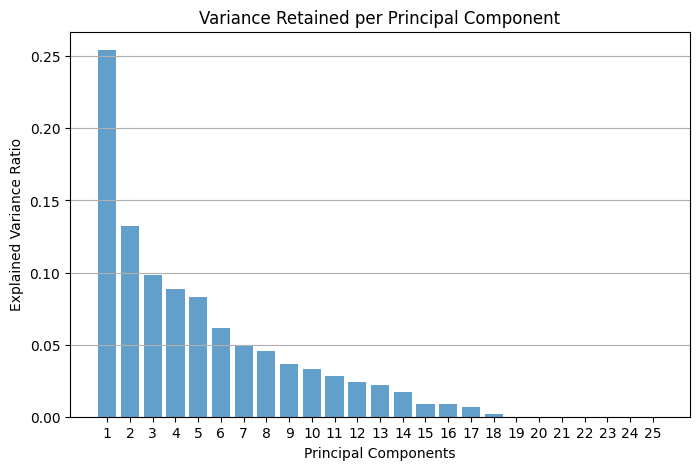

In [5]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(exp_var)+1), exp_var, alpha=0.7, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Variance Retained per Principal Component')
plt.xticks(range(1, len(exp_var)+1))
plt.grid(True, axis='y')
plt.show()

4. Determine the optimal number of components 

In [6]:
# Choose threshold within 90% - 95% variance
threshold_90 = 0.90
threshold_95 = 0.95

# Find the number of components where cumulative variance >= threshold
opt_comp_90 = np.argmax(cum_var >= threshold_90) + 1
opt_comp_95 = np.argmax(cum_var >= threshold_95) + 1

print(f"Optimal number of principal components to retain {threshold_90*100:.0f}% variance: {opt_comp_90}")
print(f"Optimal number of principal components to retain {threshold_95*100:.0f}% variance: {opt_comp_95}")

Optimal number of principal components to retain 90% variance: 11
Optimal number of principal components to retain 95% variance: 13


5. Visualise Cumulative Variance Plot

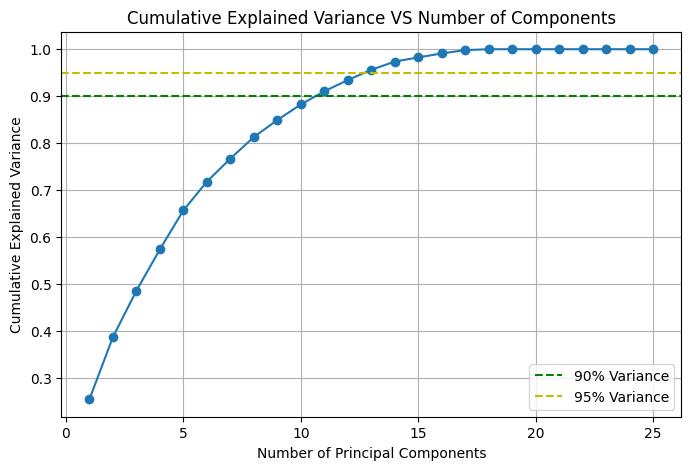

In [7]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(y=0.90, color='g', linestyle='--', label="90% Variance")
plt.axhline(y=0.95, color='y', linestyle='--', label="95% Variance")
plt.title('Cumulative Explained Variance VS Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

6. Visualise Scatter plot

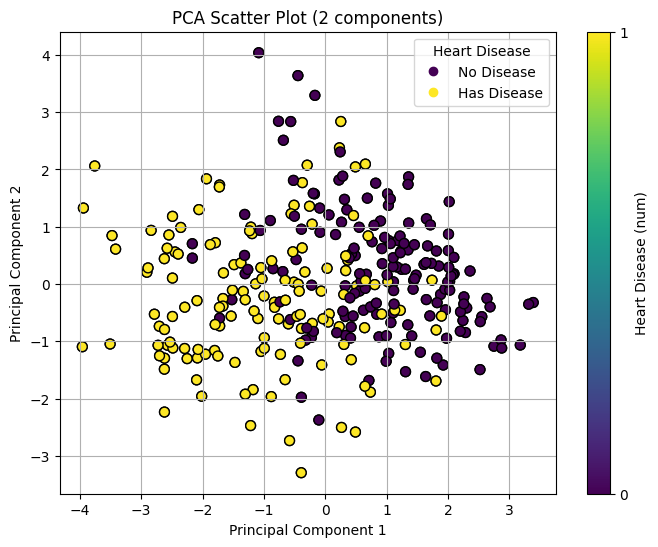

In [8]:
# Reduce data to 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot (2 components)')

cbar = plt.colorbar(scatter, ticks=[0, 1, 2, 3, 4])
cbar.set_label('Heart Disease (num)')
classes = ["No Disease", "Has Disease"]
scatter = plt.scatter(
    X_pca_2[:,0], X_pca_2[:,1], 
    c=y, cmap='viridis', edgecolor='k', s=50, label=y
)

plt.legend(handles=scatter.legend_elements()[0], labels=classes, title="Heart Disease")
plt.grid(True)
plt.show()

# PCA-transformed dataset

In [9]:
pca_opt = PCA(n_components=opt_comp_95)
X_pca_opt = pca_opt.fit_transform(X)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca_opt, columns=[f'PC{i+1}' for i in range(opt_comp_95)])
df_pca.to_csv("pca_transformed_dataset.csv", index=False)
print("✅PCA-transformed dataset saved as 'pca_transformed_dataset.csv'!")

✅PCA-transformed dataset saved as 'pca_transformed_dataset.csv'!
